#                                        Palestine data set cleaning

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

df=pd.read_csv("palestine.csv")

In [154]:
df.head(5)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
# know your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
# check name of all columns
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

In [6]:
# check shape of data rows and columns
df.shape

(11124, 16)

In [7]:
# check number of rows
df.count()

name                            11124
date_of_event                   11124
age                             10995
citizenship                     11124
event_location                  11124
event_location_district         11124
event_location_region           11124
date_of_death                   11124
gender                          11104
took_part_in_the_hostilities     9694
place_of_residence              11056
place_of_residence_district     11056
type_of_injury                  10833
ammunition                       5871
killed_by                       11124
notes                           10844
dtype: int64

In [8]:
# check null values in data set
df.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [9]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [10]:
# All Duplicated values of data set

In [11]:
duplicated = df[df.duplicated()]

In [12]:
duplicated.count().sum()

74

In [13]:
# finding only numerical duplicated values
numerical_features = df.select_dtypes(include=[np.number])
numerical_duplicate = df[numerical_features.duplicated()]

In [14]:
numerical_features.sum().duplicated()

age    False
dtype: bool

In [15]:
# imputing missing values in age columns

df_age = df["age"].isnull().sum()
print(df_age)

129


In [16]:
# lets fix missing values
df_age_mean = df["age"].mean()
print(df_age_mean)

26.745702592087312


In [17]:
df['age'].fillna(df_age_mean, inplace=True)

In [18]:
df["age"].isnull().sum()

0

In [19]:
df["age"].count()

11124

<function matplotlib.pyplot.show(close=None, block=None)>

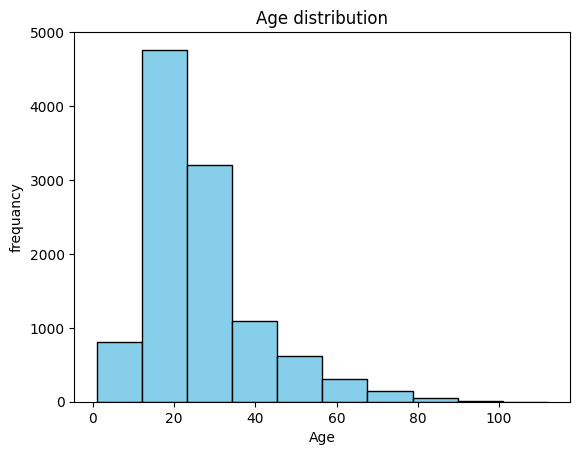

In [160]:
# univariat analysis
plt.hist(df["age"],bins=10,color = "skyblue" , edgecolor = "black")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("frequancy")
plt.show

In [21]:
numerical_features = df.select_dtypes(include=[np.number])
catagorical_features = df.select_dtypes(exclude=[np.number])

print(numerical_features.columns)
print(catagorical_features.columns)

Index(['age'], dtype='object')
Index(['name', 'date_of_event', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')


Text(0.5, 1.0, 'Higher Age of Fatalities Among Males vs. Females')

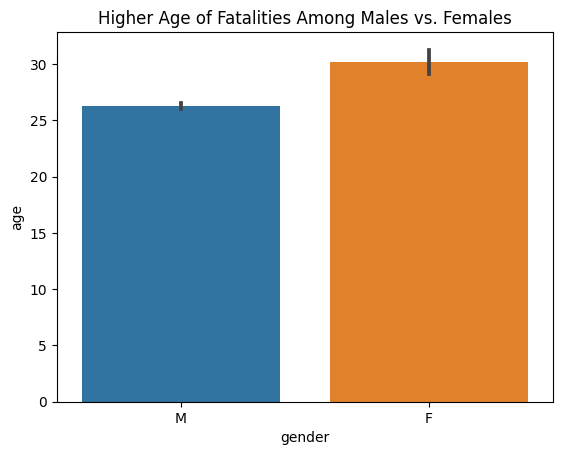

In [159]:
# bivariate analysis
sns.barplot(x="gender",y="age",data=df)
plt.title("Higher Age of Fatalities Among Males vs. Females" )

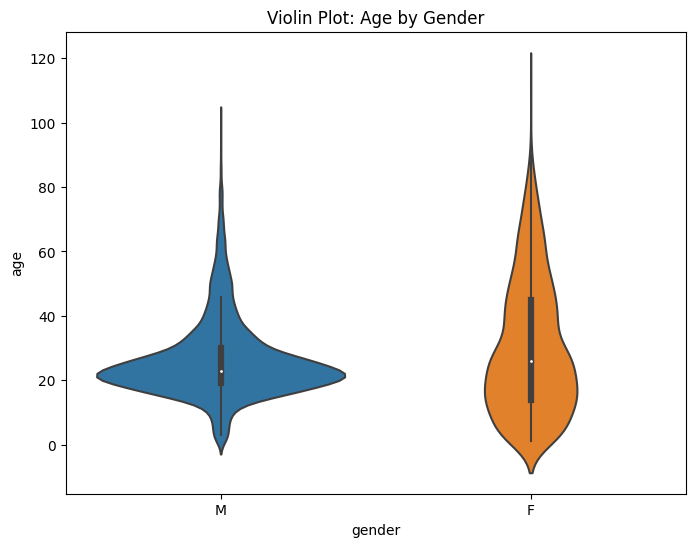

In [23]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='age', data=df)
plt.title('Violin Plot: Age by Gender')
plt.show()

In [158]:
import plotly.express as px

# This assumes you have a 'df' DataFrame with 'age' and 'type_of_injury' columns
fig = px.pie(df, values='age', names='type_of_injury', title="Injuries by Fatality")

# Adjust title size and position
fig.update_layout(title_text="Injuries by Fatality", title_x=0.5, title_font=dict(size=20))

fig.show()


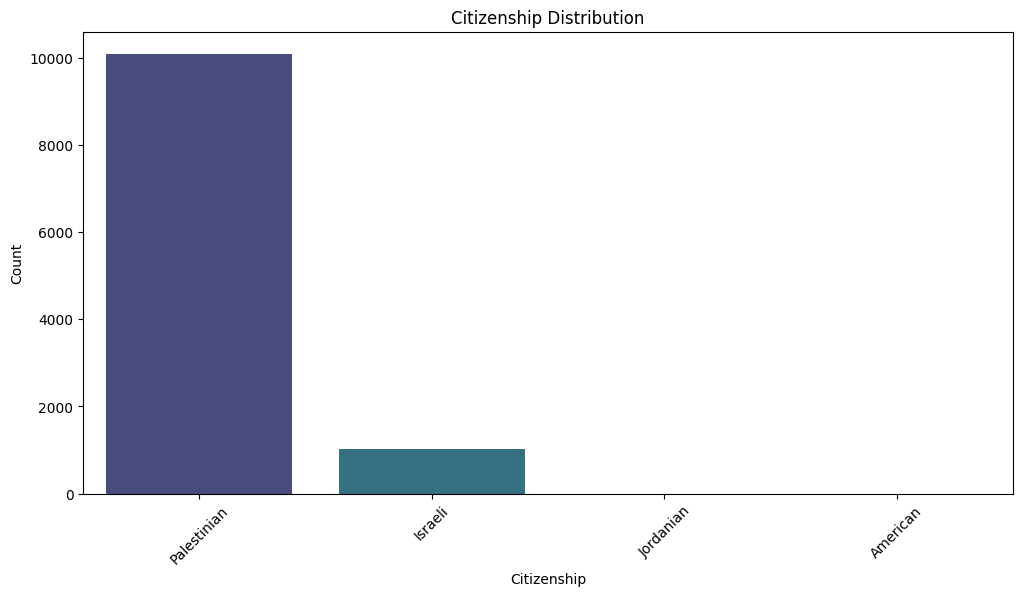

In [25]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='citizenship', order=df['citizenship'].value_counts().index, palette='viridis')
plt.title('Citizenship Distribution')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [128]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

In [137]:
#df['month'] = pd.to_datetime(df['date_of_death']).dt.month
df['year'] = pd.to_datetime(df['date_of_death']).dt.year
avg_age = df.groupby(['year'])['age'].mean().reset_index()

In [144]:
import pandas as pd
import plotly.express as px

# Extract year from date
df['year'] = pd.to_datetime(df['date_of_death']).dt.year

# Calculate mean age for each year and injury type
avg_df = df.groupby(['year', 'type_of_injury'])['age'].mean().reset_index()

# Create line plot
fig = px.line(avg_df,
              x="year",
              y="age",
              color="type_of_injury", # Color by injury type
              labels={"age": "Average Age"},
              title="Average Age of Death by Year and Injury Type")

# Customize plot
fig.update_layout(xaxis_title="Year",
                 yaxis_title="Average Age",
                 legend_title="Injury Type")

fig.show()

In [143]:
import pandas as pd

# Filter dataframe
mask = (df['year'] >= 2013) & (df['year'] <= 2023)
df = df.loc[mask]

# Extract year
df['year'] = pd.to_datetime(df['date_of_death']).dt.year

# Calculate mean age
avg_df = df.groupby(['year', 'type_of_injury'])['age'].mean().reset_index()

# Plot
fig = px.line(avg_df, x="year", y="age", color="type_of_injury")

# Set x-axis range
fig.update_layout(xaxis_range=[2018, 2023])

fig.show()

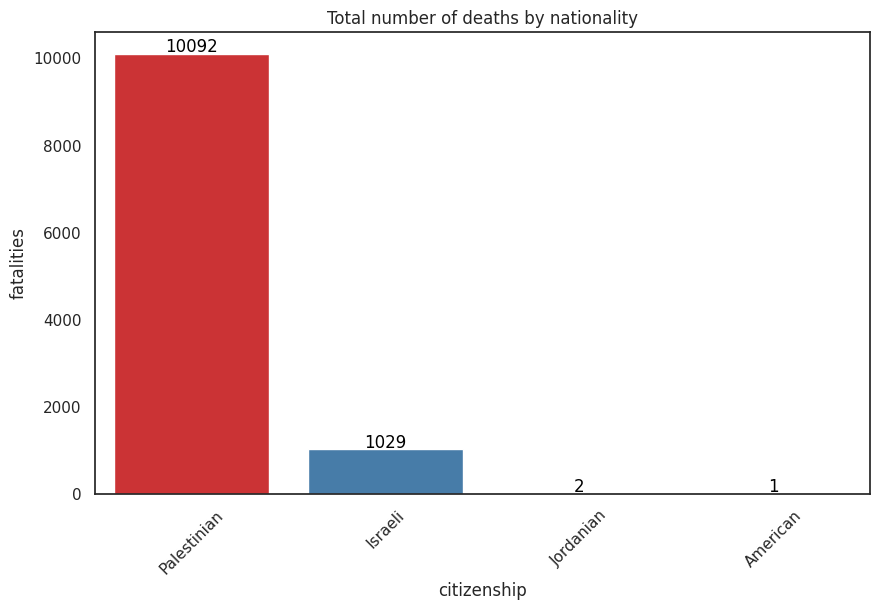

In [161]:
# Q1. Which country had more deaths?

sns.set(style="white", palette="Set1")
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'AppleGothic'


ax = sns.countplot(x='citizenship', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Total number of deaths by nationality")
plt.xlabel("citizenship")
plt.ylabel("fatalities")

plt.xticks(rotation=45)

plt.show()